# Verzeo Internship - Major Project - ML June Batch
Problem Statement :

Pima Indian Diabetes dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Do classification by at least 2 Algorithms.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import average_precision_score

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
## statistic of dataset
diabetes = df[df['Outcome']==1].shape
non_diabetes = df[df['Outcome']==0].shape
print("Has Diabetes {}, Does not have Diabetes {}".format(diabetes,non_diabetes))
df.describe()

Has Diabetes (268, 9), Does not have Diabetes (500, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


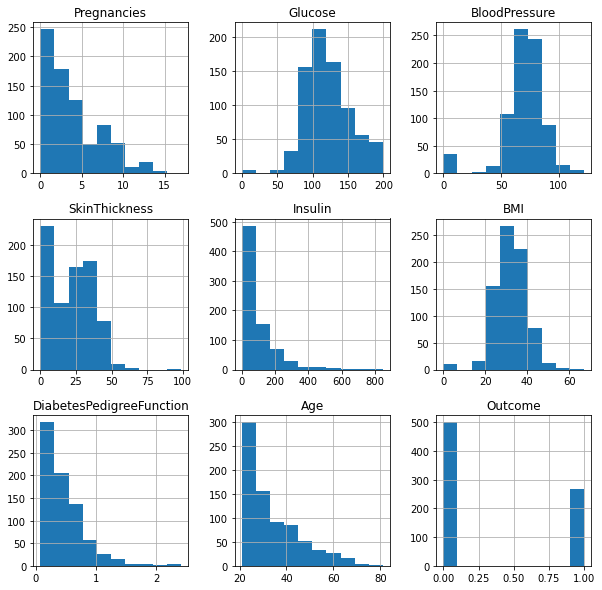

In [5]:
# x-axis range , y-axis abundance
histo = df.hist(figsize = (10,10))

In [6]:
## count of zero entries 
bp_zeros = df[df['BloodPressure']==0].shape
bmi_zeros = df[df['BMI']==0].shape
insulin_zeros = df[df['Insulin']==0].shape
glucose_zeros = df[df['Glucose']==0].shape
skin_zeros = df[df['SkinThickness']==0].shape
print('Zero Counts of BP :{},BMI : {} , Insulin : {} , Glucose : {} , skin : {} '
      .format(bp_zeros,bmi_zeros,insulin_zeros,glucose_zeros,skin_zeros))

Zero Counts of BP :(35, 9),BMI : (11, 9) , Insulin : (374, 9) , Glucose : (5, 9) , skin : (227, 9) 


In [7]:
#### pre-process Insulin & SkinThickness 

df_copy = df.copy(deep=True)

df_copy[['Insulin','SkinThickness']] = df_copy[['Insulin','SkinThickness']].replace(0,np.NaN)
## The median is the middle point of a number set, in which half the numbers are above the median and half are below
## replace null value with median
df_copy['Insulin'].fillna(df_copy['Insulin'].median(),inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(),inplace=True)
## test result
# print(df_copy[df_copy['Insulin']==0].shape,df_copy[df_copy['SkinThickness']==0].shape)
# pre-process Blood Pressure , BMI & Glucose invalid values 
# as blood pressure & glucose are critical for determing diabeties it should not be invalid 
# their null fraction is very small so it should better to remove invalid entries
df_copy = df_copy[(df_copy['BloodPressure']!=0) & (df_copy['BMI']!=0) & (df_copy['Glucose']!=0)]
# test result
# print(df_copy[df_copy['BloodPressure']==0].shape,df_copy[df_copy['BMI']==0].shape,df_copy[df_copy['Glucose']==0].shape)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
## split dataset on outcome from 70% to 30%
X = df_copy.drop('Outcome',axis=1)
y = df_copy['Outcome']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(506, 8)
(218, 8)
(506,)
(218,)


# Classification 1: Naive Bayes Classification

In [10]:
from sklearn.naive_bayes import GaussianNB

In [11]:
nb_model = GaussianNB()

In [12]:
nb_model.fit(X_train,y_train)

GaussianNB()

In [13]:
predicted_nb_model = nb_model.predict(X_test)

In [14]:
cm_nb_model = metrics.confusion_matrix(y_test,predicted_nb_model)

In [15]:
accuracy_nb_model = metrics.accuracy_score(y_test,predicted_nb_model)

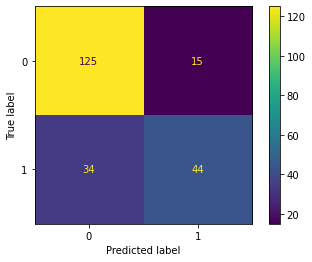

In [16]:
plot_confusion_matrix(nb_model, X_test, y_test)  
plt.show() 

In [17]:
print("Confusion Matrix: \n",cm_nb_model)
print("Accuracy: \n",accuracy_nb_model)
average_precision = average_precision_score(y_test, predicted_nb_model)
print("Average Precision = ",average_precision)

Confusion Matrix: 
 [[125  15]
 [ 34  44]]
Accuracy: 
 0.7752293577981652
Average Precision =  0.5766499607270872


In [18]:
print(classification_report(y_test,nb_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       140
           1       0.75      0.56      0.64        78

    accuracy                           0.78       218
   macro avg       0.77      0.73      0.74       218
weighted avg       0.77      0.78      0.77       218



### According to confusion matrix of Naive Bayes classifier, there are 44 who has Diabetes, 125 who does not have Diabetes and 49 which are misclassified.

# Classification 2: Support Vector Machine Classification

In [19]:
from sklearn.svm import SVC

In [20]:
svc = SVC(random_state=0, kernel='rbf')

In [21]:
svc.fit(X_train, y_train)

SVC(random_state=0)

In [22]:
svm_y_pred = svc.predict(X_test)

In [23]:
cm_svc = metrics.confusion_matrix(y_test,svm_y_pred)

In [24]:
accuracy_svc = metrics.accuracy_score(y_test,svm_y_pred)

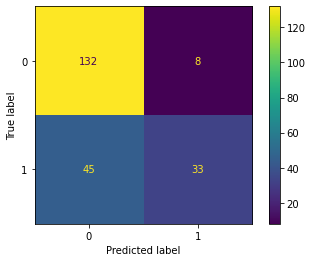

In [25]:
plot_confusion_matrix(svc, X_test, y_test)  
plt.show() 

In [26]:
print("Confusion Matrix: \n",cm_svc)
print("Accuracy: \n",accuracy_svc)
average_precision = average_precision_score(y_test, svm_y_pred)
print("Average Precision = ",average_precision)

Confusion Matrix: 
 [[132   8]
 [ 45  33]]
Accuracy: 
 0.7568807339449541
Average Precision =  0.5469473466788302


In [27]:
print(classification_report(y_test,svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83       140
           1       0.80      0.42      0.55        78

    accuracy                           0.76       218
   macro avg       0.78      0.68      0.69       218
weighted avg       0.77      0.76      0.73       218



### According to confusion matrix of Support Vector Machine classifier, there are 33 who has Diabetes, 132 who does not have Diabetes and 53 which are misclassified.